In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,table,column,func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()
session = Session(bind=conn)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
tbl_measurement=Base.classes.measurement
tbl_station=Base.classes.station
maxdate= session.query(func.max(tbl_measurement.date)).scalar()

v=str(maxdate)
v, space, time = v.partition(' ')
maxdate=dt.datetime.strptime(v, '%Y-%m-%d').date()
yearbackdate = maxdate + relativedelta(months=-12)
#print(maxdate)
#print(yearbackdate)


results = session.query(tbl_measurement.date , tbl_measurement.prcp ).\
          filter(tbl_measurement.date >= yearbackdate,tbl_measurement.prcp!=None)
sql="select date, prcp from measurement where date >=(?) and prcp is not Null"
print (sql)
measure_df= pd.read_sql_query(sql,conn,params=(yearbackdate,) )

measure_df.set_index('date',inplace=True)
measure_df=measure_df.sort_values(by=["date"])

measure_df.head(10)
#for row in results:
    #print("date :{0},prcp:{1}".format(row.date,row.prcp))

select date, prcp from measurement where date >=(?) and prcp is not Null


,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(tbl_measurement.tobs), func.avg(tbl_measurement.tobs), func.max(tbl_measurement.tobs)).\
        filter(tbl_measurement.date >= start_date).filter(tbl_measurement.date <= end_date).all()

In [16]:
#lstdate = [dt.datetime.strptime(result[0], '%y-%m-%d').date() for result in results[:10]]
#lstprecip = [(result[1]) for result in results[:10]]#lstdate = [result[0] for result in results[:10]]

lstdate=[]
for result in results:
    value_date= (dt.datetime.strptime(result[0], '%Y-%m-%d'))
    dtact=value_date.date()
    lstdate.append(dtact)
lstprcp = [result[1] for result in results]


In [17]:
vac_sdate=str(input("Please Enter Your Vacation Start Date in the following Format yyyy-mm-dd : "))
vac_endate=str(input("Please Enter Your Vacation End Date in the following Format yyyy-mm-dd : "))

sdate=dt.datetime.strptime(vac_sdate, '%Y-%m-%d').date()
edate=dt.datetime.strptime(vac_endate, '%Y-%m-%d').date()
print(sdate)
print(edate)
vac_lst=calc_temps(vac_sdate,vac_endate)
print(vac_lst)

Please Enter Your Vacation Start Date in the following Format yyyy-mm-dd : 2017-01-01
Please Enter Your Vacation End Date in the following Format yyyy-mm-dd : 2017-01-07
2017-01-01
2017-01-07
[(62.0, 68.36585365853658, 74.0)]


C:\Users\arin_\AppData\Local\conda\conda\envs\Pythondata\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\arin_\AppData\Local\conda\conda\envs\Pythondata\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


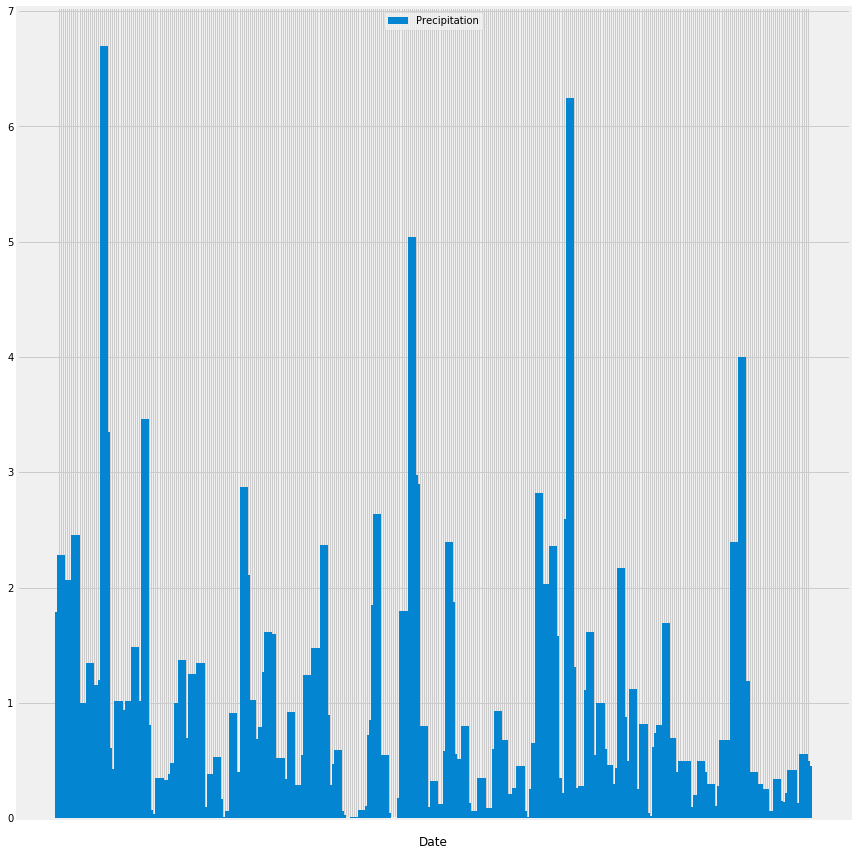

In [18]:
#measure_df.plot(kind='bar',subplots=False,Width=3,figsize=(12,12),align="center",color='blue', alpha=1,width=4,zorder=5)
plt.figure(figsize=(12,12))
plt.bar(measure_df.index,measure_df["prcp"],align="center",color='#0485d1', alpha=1,width=4,zorder=5,label ="Precipitation")
ax1 = plt.axes()
plt.grid('on')
x_axis = ax1.axes.get_xaxis()
ax1.set_xticklabels(' ') 
#ax1.set_axis_bgcolor("white")
ax1.set_xlabel("Date")
plt.legend(loc='upper center')
#ax1.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()
plt.show()
#2017-01-01
#2017-01-07

In [19]:
#fig, ax = plt.subplots()
##xpos = range(1, len(scores)+1)
#ax = plt.subplot(111)
#ax.bar([dt_val for dt_val in measure_df["date"]] , [prpt for prpt in measure_df["prcp"]])
#ax.set_xlabel("Date")
#ax.set_ylabel("Precipitation")

#fig.tight_layout()
#plt.show()

#for dt in lstprcp:
 #   print(dt)
 
##c=dt.datetime.strptime('30-01-12', '%d-%m-%y').date()
#datetime.date(2012, 1, 30)
#print(c)

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measure_desc=measure_df["prcp"].describe(include='Name')
new_m_df= pd.DataFrame(measure_desc)
new_m_df=new_m_df.rename(columns={"prcp":'precipitation'})
new_m_df.head(10)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
stationcnt=session.query(Station.station).distinct().count()
print("Station Count : ",stationcnt)

Station Count :  9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostactiveStation=session.query(Station,Measurement, (func.count(Station.station))).filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()).all()

for row in mostactiveStation:
     print("Station Name : {}, Active Count : {} ".format(row[0].station,row[2]))
        


Station Name : USC00519281, Active Count : 2772 
Station Name : USC00519397, Active Count : 2724 
Station Name : USC00513117, Active Count : 2709 
Station Name : USC00519523, Active Count : 2669 
Station Name : USC00516128, Active Count : 2612 
Station Name : USC00514830, Active Count : 2202 
Station Name : USC00511918, Active Count : 1979 
Station Name : USC00517948, Active Count : 1372 
Station Name : USC00518838, Active Count : 511 


In [23]:
mostactiveStation=session.query(Station,Measurement, (func.count(Station.station))).filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()).first()
print(" Most active Station Name : {}, Active Count : {} ".format(mostactiveStation[0].station,mostactiveStation[2]))
station_id=mostactiveStation[0].station

 Most active Station Name : USC00519281, Active Count : 2772 


In [24]:
tobsresults = session.query(tbl_measurement.date ,tbl_measurement.station, tbl_measurement.tobs ).\
          filter(tbl_measurement.date >= yearbackdate,tbl_measurement.tobs!=None)
for row in tobsresults:
    print(row)

('2016-08-23', 'USC00519397', 81.0)
('2016-08-24', 'USC00519397', 79.0)
('2016-08-25', 'USC00519397', 80.0)
('2016-08-26', 'USC00519397', 79.0)
('2016-08-27', 'USC00519397', 77.0)
('2016-08-28', 'USC00519397', 78.0)
('2016-08-29', 'USC00519397', 78.0)
('2016-08-30', 'USC00519397', 79.0)
('2016-08-31', 'USC00519397', 80.0)
('2016-09-01', 'USC00519397', 81.0)
('2016-09-02', 'USC00519397', 80.0)
('2016-09-03', 'USC00519397', 79.0)
('2016-09-04', 'USC00519397', 75.0)
('2016-09-05', 'USC00519397', 79.0)
('2016-09-06', 'USC00519397', 76.0)
('2016-09-07', 'USC00519397', 76.0)
('2016-09-08', 'USC00519397', 80.0)
('2016-09-09', 'USC00519397', 79.0)
('2016-09-10', 'USC00519397', 78.0)
('2016-09-11', 'USC00519397', 76.0)
('2016-09-12', 'USC00519397', 78.0)
('2016-09-13', 'USC00519397', 78.0)
('2016-09-14', 'USC00519397', 75.0)
('2016-09-15', 'USC00519397', 79.0)
('2016-09-16', 'USC00519397', 80.0)
('2016-09-17', 'USC00519397', 79.0)
('2016-09-18', 'USC00519397', 81.0)
('2016-09-19', 'USC00519397'

('2017-05-23', 'USC00519281', 71.0)
('2017-05-24', 'USC00519281', 74.0)
('2017-05-25', 'USC00519281', 74.0)
('2017-05-26', 'USC00519281', 74.0)
('2017-05-27', 'USC00519281', 74.0)
('2017-05-28', 'USC00519281', 80.0)
('2017-05-29', 'USC00519281', 74.0)
('2017-05-30', 'USC00519281', 72.0)
('2017-05-31', 'USC00519281', 75.0)
('2017-06-01', 'USC00519281', 80.0)
('2017-06-02', 'USC00519281', 76.0)
('2017-06-03', 'USC00519281', 76.0)
('2017-06-04', 'USC00519281', 77.0)
('2017-06-05', 'USC00519281', 75.0)
('2017-06-06', 'USC00519281', 75.0)
('2017-06-07', 'USC00519281', 75.0)
('2017-06-08', 'USC00519281', 75.0)
('2017-06-09', 'USC00519281', 72.0)
('2017-06-10', 'USC00519281', 74.0)
('2017-06-11', 'USC00519281', 74.0)
('2017-06-12', 'USC00519281', 74.0)
('2017-06-13', 'USC00519281', 76.0)
('2017-06-14', 'USC00519281', 74.0)
('2017-06-15', 'USC00519281', 75.0)
('2017-06-16', 'USC00519281', 73.0)
('2017-06-17', 'USC00519281', 79.0)
('2017-06-18', 'USC00519281', 75.0)
('2017-06-19', 'USC00519281'

In [25]:
# temperature observation data for 12 months

sql="select date,station, tobs from measurement where date >=(?) and tobs is not Null"
print (sql)
print(yearbackdate)
tobs_df= pd.read_sql_query(sql,conn,params=(yearbackdate,) )
tobs_df.head()

select date,station, tobs from measurement where date >=(?) and tobs is not Null
2016-08-23


,date,station,tobs
0,2016-08-23,USC00519397,81.0
1,2016-08-24,USC00519397,79.0
2,2016-08-25,USC00519397,80.0
3,2016-08-26,USC00519397,79.0
4,2016-08-27,USC00519397,77.0


In [26]:
tobs_grp=tobs_df.groupby("station").count().sort_values("tobs",ascending=False)
tobs_grp.head(10)
#####check needed
#state_violence_df=region_vict_df.groupby(["Year","state"],as_index=False).agg({'incident_id':'count', 'casualty':'sum'})

,date,tobs
station,,
USC00519397,361,361
USC00519281,352,352
USC00516128,349,349
USC00513117,343,343
USC00519523,337,337
USC00514830,305,305
USC00517948,183,183


In [27]:
#max_tobs_grp=tobs_grp.head(1)
#max_tobs_grp=max_tobs_grp.reset_index()
#station_id=max_tobs_grp.iloc[0,0]
#max_tobs_grp.head()
print(station_id)

USC00519281


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tobs_obs_results=session.query(Measurement.station,(func.Max(Measurement.tobs)),(func.Min(Measurement.tobs)),(func.avg(Measurement.tobs))).\
                    filter(Measurement.station==station_id)
#
#print(" Most active Station Name : {}, Max temp : {}, Min temp : {}, Avg temp : {},  ".format(tobs_obs_results[0],tobs_obs_results[1],tobs_obs_results[2],tobs_obs_results[3]))
for row in tobs_obs_results:
    #print(row)
    print(" Most Active Station Name : {}, Max temp : {}, Min temp : {}, Avg temp : {},  ".\
          format(row[0],row[1],row[2],row[3]))

 Most Active Station Name : USC00519281, Max temp : 85.0, Min temp : 54.0, Avg temp : 71.66378066378067,  


In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#tobs_df.head(10)
#tobs_station_df= tobs_df.where(tobs_df["station"]==station_id)####station_id)
##del(tobs_station_df["date"])
##del(tobs_station_df["station"])
####tobds_freq_grp=tobs_station_df.groupby(["tobs"],as_index=False).count()
####tobds_freq_grp=tobds_freq_grp.rename(columns={"station":"occurences"})
####tobds_freq_grp.head(100)



#print(station_id)

#tobs_station_df.head()
special_df=session.query(Measurement.station,Measurement.tobs).\
                    filter(Measurement.station==station_id,Measurement.date >= yearbackdate).all()
tobs_station_df=pd.DataFrame(special_df)
tobs_station_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


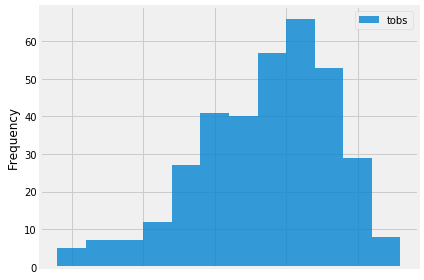

In [30]:

#tobds_freq_grp.plot.hist(bins=12)
#tobs_station_df.plot.hist(bins=12, stacked=True, alpha=.5)
plt.hist(tobs_station_df["tobs"], bins=12,stacked=True, color='#0485d1',alpha=.8,label="tobs")

ax1 = plt.axes()
plt.grid('on')
x_axis = ax1.axes.get_xaxis()
ax1.set_xticklabels(' ') 
#ax1.set_axis_bgcolor("white")
ax1.set_ylabel("Frequency")
plt.legend(loc='upper right')
#ax1.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#yearbackdate = maxdate + relativedelta(months=-12)
ysdate=sdate+ relativedelta(months=-12)
yedate=edate+ relativedelta(months=-12)
days=yedate-ysdate
vacdays=days.days
yrbkvac_lst=(calc_temps(ysdate, yedate))
print(yrbkvac_lst)
print(days.days)

[(62.0, 69.92857142857143, 76.0)]
6


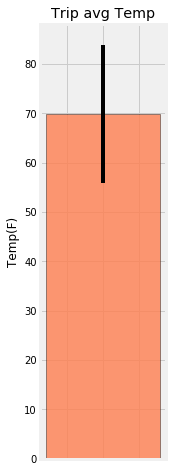

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)




avg_temp_y=yrbkvac_lst[0][1]
min_temp=yrbkvac_lst[0][0]
max_temp=yrbkvac_lst[0][2]
plt.figure(figsize=(2,8))
plt.bar(1,avg_temp_y,edgecolor='black',color='coral',yerr=(max_temp-min_temp),alpha=.8)
ax2 = plt.axes()
x_axis1 = ax2.axes.get_xaxis()
ax2.set_xticklabels(' ') 
ax2.set_ylabel("Temp(F)")
plt.title("Trip avg Temp")
plt.show()

In [34]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#latitude FLOAT
#longitude FLOAT
#elevation FLOAT

rainfall_res = session.query(tbl_measurement.date , tbl_measurement.prcp,tbl_measurement.station,tbl_station.latitude, tbl_station.longitude,tbl_station.elevation).\
          filter(tbl_measurement.station==tbl_station.station).\
          filter(tbl_measurement.date >= ysdate,tbl_measurement.date <= yedate,tbl_measurement.prcp!=None).all()

rain_df=pd.DataFrame(rainfall_res)
rain_df.head(10)
rain_df.to_csv("tst.csv")

In [35]:
rainfall_sum_df=rain_df.groupby(["station","latitude","longitude","elevation"],as_index=False).agg({"prcp":"sum"}).sort_values("prcp",ascending=False)
rainfall_sum_df.head(10)

,station,latitude,longitude,elevation,prcp
2,USC00516128,21.33310,-157.80250,152.4,2.94
3,USC00519281,21.45167,-157.84889,32.9,0.93
0,USC00513117,21.42340,-157.80150,14.6,0.55
1,USC00514830,21.52130,-157.83740,7.0,0.22
4,USC00519397,21.27160,-157.81680,3.0,0.18
5,USC00519523,21.33556,-157.71139,19.5,0.13


## Optional Challenge Assignment

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date1):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(tbl_measurement.tobs), func.avg(tbl_measurement.tobs), func.max(tbl_measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", tbl_measurement.date) == date1).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:

sdate=dt.datetime.strptime('2017-01-01', '%Y-%m-%d').date()
edate=dt.datetime.strptime('2017-01-07', '%Y-%m-%d').date()
vacdays = edate.day-sdate.day+1
day = dt.datetime.strptime(vac_sdate, '%Y-%m-%d').date()
lst_vdates=[]
normals=[]
#print(day)
print(vacdays)
#print(dt.datetime.strftime(day,'%m-%d'))
#print(dt.datetime.strftime(day,'%d'))

for x in range (0, vacdays):
    workingdate=(day + dt.timedelta(days = x))
    dvalue=str(dt.datetime.strftime(workingdate,'%m-%d'))
    lst_vdates.append(dvalue)
print (lst_vdates)

for item in lst_vdates:
    dat_ret=daily_normals(item) 
    #print(dat_ret)
    normals.append(dat_ret[0])
#print(str(day.month) +"-"+str(day.day))
print(normals)
#print(dvalue)

# calculate the daily normals for your trip



# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


7
['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07']
[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_dict={}
normal1=[]
a=[]
#a=list(normals[0])
#a=list(a)
for i in range ( 0,vacdays):
    a.append(list(normals[i]))
print(a)
normals_dict.update({"vdate":lst_vdates,"normals":a})



#print(normals_dict["vdate"][1],normals_dict["normals"][1][0][1])
normals_df=pd.DataFrame(normals_dict)
        
print(normals_dict)
        
#normals_result= session.query(func.min(tbl_measurement.tobs), func.avg(tbl_measurement.tobs), func.max(tbl_measurement.tobs)).\
#        filter(tbl_measurement.date >= sdate).filter(tbl_measurement.date <= edate).all()

#for row in normals_result:
#    print(row)
#normals_df=pd.DataFrame(normals_result)
normals_df.head(20)
#normals_df["normals"][0]

[[62.0, 69.15384615384616, 77.0], [60.0, 69.39622641509433, 77.0], [62.0, 68.9090909090909, 77.0], [58.0, 70.0, 76.0], [56.0, 67.96428571428571, 76.0], [61.0, 68.96491228070175, 76.0], [57.0, 68.54385964912281, 76.0]]
{'vdate': ['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07'], 'normals': [[62.0, 69.15384615384616, 77.0], [60.0, 69.39622641509433, 77.0], [62.0, 68.9090909090909, 77.0], [58.0, 70.0, 76.0], [56.0, 67.96428571428571, 76.0], [61.0, 68.96491228070175, 76.0], [57.0, 68.54385964912281, 76.0]]}


,vdate,normals
0,01-01,"[62.0, 69.15384615384616, 77.0]"
1,01-02,"[60.0, 69.39622641509433, 77.0]"
2,01-03,"[62.0, 68.9090909090909, 77.0]"
3,01-04,"[58.0, 70.0, 76.0]"
4,01-05,"[56.0, 67.96428571428571, 76.0]"
5,01-06,"[61.0, 68.96491228070175, 76.0]"
6,01-07,"[57.0, 68.54385964912281, 76.0]"


In [39]:
normals_df["normals"][4][2]

76.0

x:7


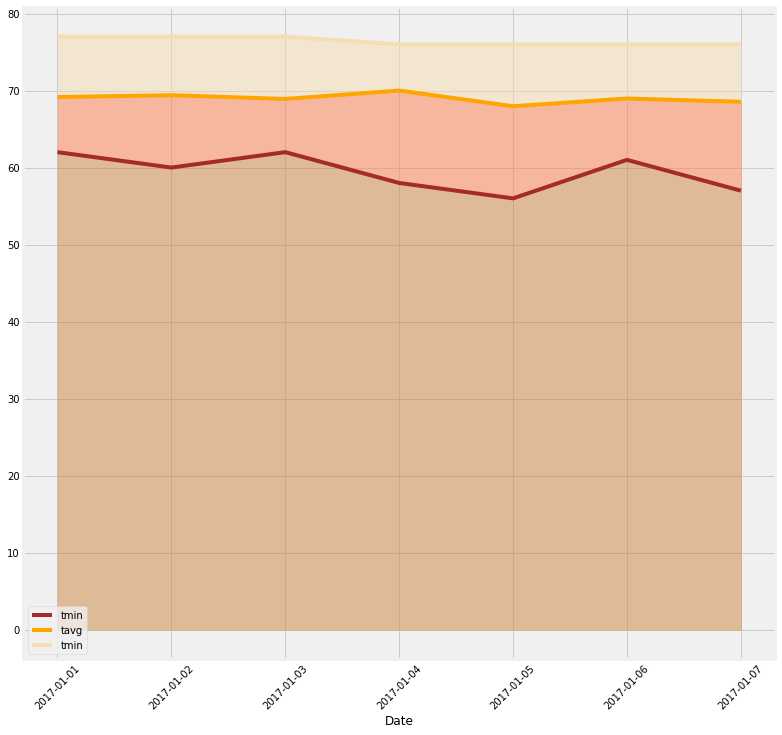

In [40]:
# Plot the daily normals as an area plot with `stacked=False`


x= [dt for dt in normals_df["vdate"]]
#x=np.array(x)
#ymin= [float(min) for min in normals_df["vdate"][0][0]]
print("x:"+str(len(x)))
ymin=[]
for i in range (0,vacdays):
    ymin.append(normals_df["normals"][i][0])

#y=np.array(ymin)

yavg=[]
for i in range (0,vacdays):
    yavg.append(normals_df["normals"][i][1])
#yavg=[float(avgt) for avgt in normals_df["vdate"][0][1]]
#zavg=np.array()
ymax=[]
for i in range (0,vacdays):
    ymax.append(normals_df["normals"][i][2])
#ymax=[float(maxt) for maxt in normals_df["vdate"][0][2]]
plt.figure(figsize=(12,12))
ax1 = plt.axes()
plt.plot(x,ymin,color='brown',label='tmin')
plt.plot(x, yavg,color='orange',label='tavg')
plt.plot(x, ymax,color="wheat",label='tmin')
ax1.fill_between(x, 0, ymin,color="peru",alpha=.5)
ax1.fill_between(x, ymin, yavg,color="coral",alpha=.5)
ax1.fill_between(x, yavg, ymax,color="wheat",alpha=.5)
plt.legend(loc='lower left')
plt.xticks([days for days in range (0,vacdays)], (day + dt.timedelta(days = x) for x in range (0, vacdays)))
plt.xticks(rotation=45)
ax1.set_xlabel("Date")
plt.show()